# Chi Square Test 卡方检验

#### test1：抽取10000次，每次100颗，显示该案例的卡方值分布

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

candy_lst = np.random.choice(['高粱饴', '大白兔', '大虾酥', '酒心糖', '巧克力'], 1000, [0.4, 0.2, 0.2, 0.15, 0.05])

### 1. 卡法公式
- 卡方值 = 将每种类别变量的 （观察频次 - 期望频次）/ 期望频次

In [106]:
from IPython.display import Image
Image(url="WechatIMG49.png", width=300, height=300)

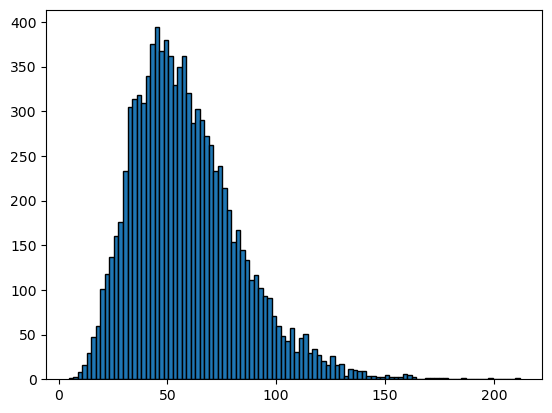

In [206]:
# 绘制当前案例的卡方分布图
def chi_square(rnd_pick):
    val_count_rnd = np.array(np.unique(rnd_pick, return_counts=True)).T
    df_ex = pd.DataFrame(val_count_rnd,columns=['type','counts'])
    df_ob = pd.DataFrame({'type': ['高粱饴', '大白兔', '大虾酥', '酒心糖', '巧克力'], 'counts':[40,20,20,15,5]})
    combined_df = df_ob.merge(df_ex,on='type',suffixes=['_ex','_ob'])
    combined_df.counts_ob = combined_df.counts_ob.astype('int')
    combined_df['chi'] = ((combined_df.counts_ob - combined_df.counts_ex)**2)/combined_df.counts_ex
    cs = combined_df.chi.sum()
    return cs

df = pd.DataFrame(columns=['chi_square'])
for i in range(10000):
    rnd_pick_100 = np.random.choice(candy_lst, 100)
    cs = chi_square(rnd_pick_100)
    df.loc[len(df)] = cs

plt.hist(df,edgecolor='black',bins=100)
plt.show()

- 结果为一个较为光滑的卡方分布。类别变量的种类 n=5，卡方分布的自由度 df=n-1=4。
- 卡方分布是朝右边的尾巴尖倾斜的，（postively skewed）
- 卡方值越大（分布右侧），说明ob和ex的差异越大，选取样本越极端，越应该拒绝H0
- 卡方值越小（分布左侧），说明ob和ex的差异越小，选取样本越不极端，越应该接受H0

In [108]:
rnd_pick_100 = np.random.choice(candy_lst, 100)
cs = chi_square(rnd_pick_100)
p = len(df[df.chi_square>=cs])/10000
print(p)
print('- 假如α设定为0.05的话,p>α。于是,这个样本不极端,不显著,于是无法拒绝H0,认为总体中类别变量的分布,仍然符合姥爷勾兑的比例。')

0.066
- 假如α设定为0.05的话,p>α。于是,这个样本不极端,不显著,于是无法拒绝H0,认为总体中类别变量的分布,仍然符合姥爷勾兑的比例。


### 2.拟合优度
- "拟合优度"可以用p值来表示的。p值越大,说明样本的卡方值越小,观测频次和期望频次之间的差异也越小,样本越能拟合期望,样本越能代表总体。
- p值越小,说明样本卡方值越大,观测频次和期望频次之间的差异也越大,样本越不符合期望,样本越不能代表总体。

In [233]:
import scipy.stats as stats
rnd_pick_100 = np.random.choice(candy_lst, 100)
val_count_rnd = np.array(np.unique(rnd_pick_100, return_counts=True)).T
df_ex = pd.DataFrame(val_count_rnd,columns=['type','counts'])
df_ob = pd.DataFrame({'type': ['高粱饴', '大白兔', '大虾酥', '酒心糖', '巧克力'], 'counts':[40,20,20,15,5]})
df_ex_ob = df_ex.merge(df_ob, on='type',suffixes=['_ob','_ex'])
df_ex_ob

,type,counts_ob,counts_ex
0,大白兔,17,20
1,大虾酥,19,20
2,巧克力,14,5
3,酒心糖,21,15
4,高粱饴,29,40


In [231]:
ob = df_ex_ob.counts_ob.to_list()
cs,p = stats.chisquare(df_ex_ob.counts_ob.to_list(), df_ex_ob.counts_ex.to_list())
cs,p

(48.025, 9.325257973356322e-10)